In [322]:
import numpy as np 
import matplotlib.pyplot as plt 

In [323]:
"""
Сгенерируем выборку случайных чисел размером 100 и 1000 
для двух распределений – экспоненциального и нормального.

"""

rv_100 = np.random.exponential(1,size=100)
rv_100 = np.random.normal(0, 1, size=100)

rv_1000 = np.random.exponential(1,size=1000)
rv_1000 = np.random.normal(0, 1 ,size=1000)

In [324]:
# вопрос 1
"""
Посчитаем выборочное среднее и дисперсию, сравнить с математическим 
ожиданием соответствующих распределений
"""
print('Mean for rv:', np.mean(rv_100))
print('Var for rv:', np.var(rv_100))

Mean for rv: 0.052236082076757395
Var for rv: 0.9520471606107139


In [325]:
# вопрос 2
"""
Посчитаем 0.5 и 0.99 квантили, сравнить с соответствующими теоретическими 
значениями
"""
print("Квантиль 0,5 для rv_100 =", np.quantile(rv_100,0.5))
print("Квантиль 0,9 для rv_100 =", np.quantile(rv_100,0.9))

print("Квантиль 0,5 для rv_1000 =", np.quantile(rv_1000,0.5))
print("Квантиль 0,9 для rv_1000 =", np.quantile(rv_1000,0.9))

Квантиль 0,5 для rv_100 = -0.015506004581696431
Квантиль 0,9 для rv_100 = 1.3644434844087159
Квантиль 0,5 для rv_1000 = 0.0032744079603283086
Квантиль 0,9 для rv_1000 = 1.246661253952686


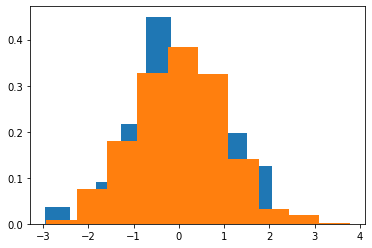

In [326]:
# вопрос 3
"""
Построим гистограмму распределения
"""
fig = plt.figure()
plt.hist(rv_100, histtype='stepfilled' , density=True)
plt.hist(rv_1000, histtype='stepfilled' , density=True)
plt.show()

In [327]:
# вопрос 4
"""
Построим функцию распределения случайной величины на основе выборки (на 
одном графике показать функции распределения, полученные из выборок 
разного размера и теоретическую 
"""
# Для экспоненциального распределение (1-exp(-lambd*x))

def fun_exp(lambd, x):
    return 1 - np.exp(-lambd*x)

def dist_exp(lambd, x):
    return lambd*np.exp(-lambd*x)

In [328]:
exp_x = np.linspace(0,10,100)
exp_y = fun_exp(1, exp_x)

dist_exp_y = dist_exp(1, exp_x)

In [329]:
exp_100_copy= np.copy(rv_100)
exp_1000_copy= np.copy(rv_1000)

In [330]:
exp_100_copy.sort()
exp_1000_copy.sort()

In [331]:
exp_100_copy_y = np.arange(0,1,0.01)
exp_1000_copy_y = np.arange(0,1,0.001)

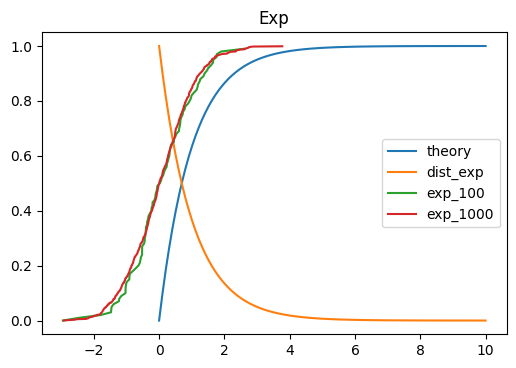

In [332]:
from cProfile import label

fig =plt.figure(dpi=100)
plt.title('Exp')
plt.plot(exp_x, exp_y, label='theory')
plt.plot(exp_x, dist_exp_y, label ='dist_exp')
plt.plot(exp_100_copy,exp_100_copy_y, label='exp_100')
plt.plot(exp_1000_copy,exp_1000_copy_y, label='exp_1000')
plt.legend()
plt.show()


In [336]:
# Для нормального распределение (f(x) = (1/sig*scrt(2*pi))*(-0.5(x-mui)/sig)^2))

from cmath import pi

def fun_norm(x, miu, var):
    return (1 / var * np.sqrt(2 * np.pi)) * np.exp(-0.5 *((x - miu) / var)**2)

def dist_norm(x, miu, var): 
    return (np.pi*var) * np.exp(-0.5*((x-miu)/var)**2)


In [337]:
from statistics import mean


norm_x = np.linspace(1, 10, 100)
norm_y = fun_norm(norm_x, 0 , 1)

dist_norm_y = dist_norm(norm_x, 0, 1)

In [ ]:
norm_100_copy= np.copy(rv_100)
norm_1000_copy= np.copy(rv_1000)

In [ ]:
norm_100_copy.sort()
norm_1000_copy.sort()

In [ ]:
norm_100_copy_y= np.arange(0, 1, 0.01)
norm_1000_copy_y = np.arange(0, 1, 0.001)

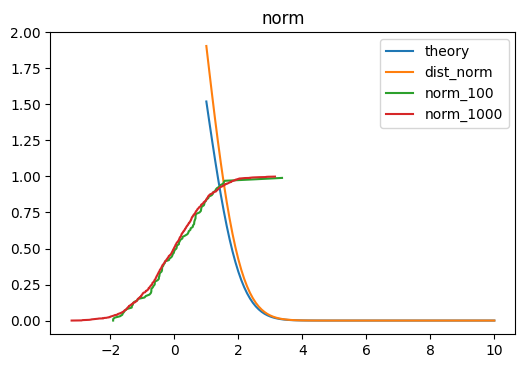

In [338]:
from cProfile import label
fig =plt.figure(dpi=100)
plt.title('norm')
plt.plot(norm_x , norm_y, label='theory')
plt.plot(norm_x , dist_norm_y, label='dist_norm')
plt.plot(norm_100_copy, norm_100_copy_y, label='norm_100')
plt.plot(norm_1000_copy,norm_1000_copy_y, label='norm_1000')
plt.legend()
plt.show()


In [412]:
# Задание 2 :
"""
Сгенерировать три выборки размера 100, 1000 и 10000 для случайных 
расстояний между двумя точками, равномерно распределенные в прямоугольнике со 
сторонами 10 и 30. Получить среднее значение расстояния между точками, построить 
функцию распределения вероятностей и плотности вероятностей случайных 
расстояний. Показать разницу между соответствующими функциями на одном 
графике
"""
# построим функцию для случайных рясстояний с двумя точками

def distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [413]:
# сдаем функцию с случайных рясстояний 

def distance_line(number):
    a = 10
    b = 30 
    distances = []

    #строим выборки для равномерного распределенния в прямоугольнике двумя точками

    for i in range (number):
        x1 = np.random.uniform(0,a)
        y1 = np.random.uniform(0,b)

        x2 = np.random.uniform(0,a)
        y2 = np.random.uniform(0,b)
        
        distances.append(distance(x1,y1,x2,y2))
    distances.sort()
    return distances 

In [414]:
# Получим среднее значение расстояния между точками (100, 1000, 10000)

rand_dist = distance_line(100)
print("AVERAGE of distnce is :", np.average(rand_dist))

rand_dist2 = distance_line(1000)
print("AVERAGE of distnce is :", np.average(rand_dist2))

rand_dist3 = distance_line(100)
print("AVERAGE of distnce is :", np.average(rand_dist3))

AVERAGE of distnce is : 12.051125546716092
AVERAGE of distnce is : 11.130794208344836
AVERAGE of distnce is : 12.016911683106468


In [429]:
#построим фуцнкцию и плотность равномерного распределение на отрезке [a, b]

rsv_unif = np.random.uniform(10, 30, 100)
rsv_unif1 = np.random.uniform(10, 30, 1000)
rsv_unif2 = np.random.uniform(10, 30, 10000)


def dist_unif(a, b, x):
    return 1 /(a - b) 

In [442]:
unifor_x = np.linspace(1, 10, 100)
unifor_y = dist_unif (10, 30, unifor_x)

In [443]:
unif_100_copy = np.copy(rsv_unif)
unif_1000_copy = np.copy(rsv_unif1)
unif_10000_copy = np.copy(rsv_unif2)

In [444]:
unif_100_copy.sort()
unif_1000_copy.sort()
unif_10000_copy.sort()

In [445]:
unif_100_copy_y = np.arange(0, 1, 0.01)
unif_1000_copy_y = np.arange(0, 1, 0.001)
unif_10000_copy_y = np.arange(0, 1, 0.0001)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

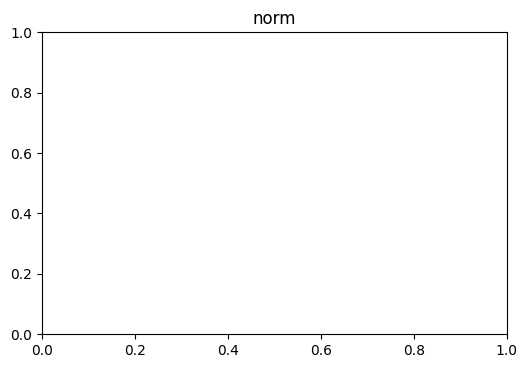

In [446]:
from cProfile import label
fig =plt.figure(dpi=100)
plt.title('norm')
plt.plot(unifor_x , unifor_y, label='theory')
plt.plot(unif_100_copy , unif_100_copy_y, label='uni_100')
plt.plot(unif_1000_copy, unif_1000_copy_y, label='unif_1000')
plt.plot(unif_10000_copy, unif_10000_copy_y, label='unif_10000')
plt.legend()
plt.show()